**Κατεβάστε από https://drive.google.com/file/d/1SoOZUfqH3ek9_sNjEQE3bi8fJ1_EnAUL/view το dataset «Air Distances Between Cities in Statute Miles» που περιέχει
την απόσταση μεταξύ πόλεων είτε του κόσμου είτε των Ηνωμένων πολιτειών μετρούμενων
σε μίλια κατά μήκος μέγιστων κύκλων.**

Επαναλαμβάνω την ίδια διαδικασία ανάγνωσης του εγγράφου για τον διαχωρισμό των δεδομένων από τις ετικέτες.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# Πρέπει να αλλάξει ανάλογα με την θέση του αρχείου Data_ex1 στο Google Drive
# Διαφορετικά να βγει από σχόλιο η τελευταία γραμμή του κελιού
path_to_data = '/content/gdrive/MyDrive/Colab Notebooks/Pattern Recognition/HW 03/'

import numpy as np
import os
world_distance = np.loadtxt(os.path.join(path_to_data, "Distance_Matrix_world.txt"), dtype=float, encoding=None, delimiter=" ")
us_distance = np.loadtxt(os.path.join(path_to_data, "Distance_Matrix_US.txt"), dtype=float, encoding=None, delimiter=" ")

del path_to_data

# Εάν θέλουμε να ανεβάσουμε χειροκίνητα τα αρχεία
# world_distance = np.loadtxt('Distance_Matrix_world.txt', dtype=float, encoding=None, delimiter=" ")
# us_distance = np.loadtxt('Distance_Matrix_US.txt', dtype=float, encoding=None, delimiter=" ")

Mounted at /content/gdrive


# **ΕΡΩΤΗΜΑ Α**

**Χρησιμοποιείστε τη μέθοδο classical MDS για να δημιουργήσετε μία διανυσματική αναπαράσταση των πόλεων του κόσμου (Distance_Matrix_world) στις δύο και στις τρεις διαστάσεις. Απεικονίστε τις αναπαραστάσεις αυτές σε κατάλληλο διάγραμμα και σχολιάστε το αποτέλεσμα.**

Η Classical Multidimentional Scaling (MDS) είναι στατιστική τεχνική που χρησιμοποιείται για την μείωση των διαστάσεων των δεδομένων εστιάζοντας στον διαχωρισμό των δεδομένων διατηρώντας όσο το δυνατόν καλύτερα τις αποστάσεις μεταξύ των σημείων.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


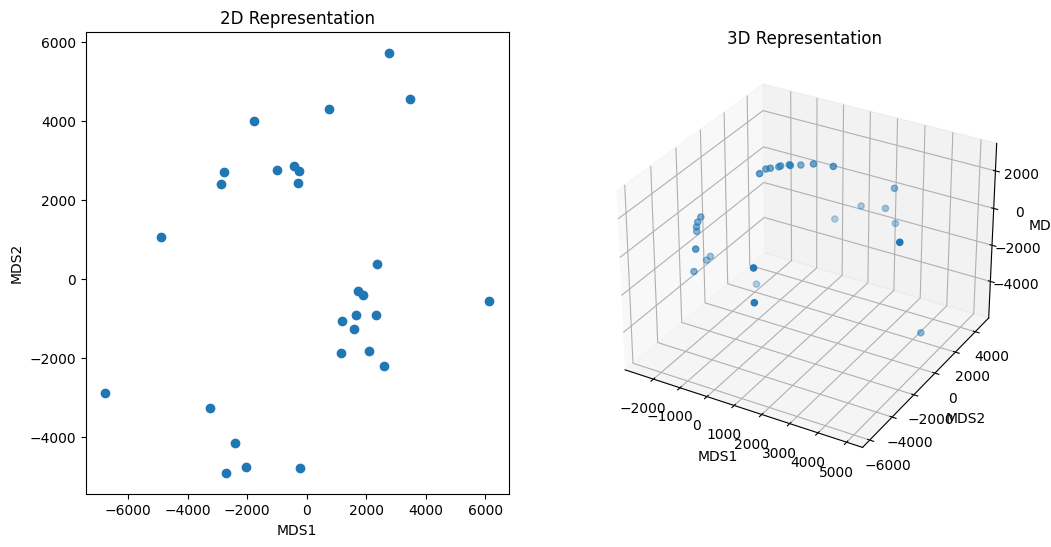

In [14]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mds_2d = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=1)

# Fitting the model to the distance matrix
points_2d = mds_2d.fit_transform(world_distance)
points_3d = mds_3d.fit_transform(world_distance)


fig = plt.figure(figsize=(12, 6))

# 2D representation
ax1 = fig.add_subplot(121)
ax1.scatter(points_2d[:, 0], points_2d[:, 1])
ax1.set_title('2D Representation')
ax1.set_xlabel('MDS1')
ax1.set_ylabel('MDS2')

# 3D representation
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2])
ax2.set_title('3D Representation')
ax2.set_xlabel('MDS1')
ax2.set_ylabel('MDS2')
ax2.set_zlabel('MDS3')

plt.show()

# **ΕΡΩΤΗΜΑ Β**

**Δημιουργείστε για τις πόλεις μία διανυσματική αναπαράσταση με τις μέγιστες
διαστάσεις d που μπορεί να σας επιστρέψει ο αλγόριθμος MDS.**

Ο μέγιστος αριθμός διαστάσεων d είναι n-1, όπου n το πλήθος των πόλεων. Στην παρούσα εργασία, εφόσον έχω 28 πόλεις, ο μέγιστος αριθμός διαστάσεων είναι 27.

In [11]:
max_dimensions = world_distance.shape[0] - 1

mds_max = MDS(n_components=max_dimensions, dissimilarity='precomputed', random_state=1)
points_max_dim = mds_max.fit_transform(world_distance)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


**Εάν Υ ο πίνακας με τις αναπαραστάσεις για τις Ν πόλεις, να δημιουργήστε το διάγραμμα των ιδιοτιμών του πίνακα Y×Y^T σε φθίνουσα σειρά.**

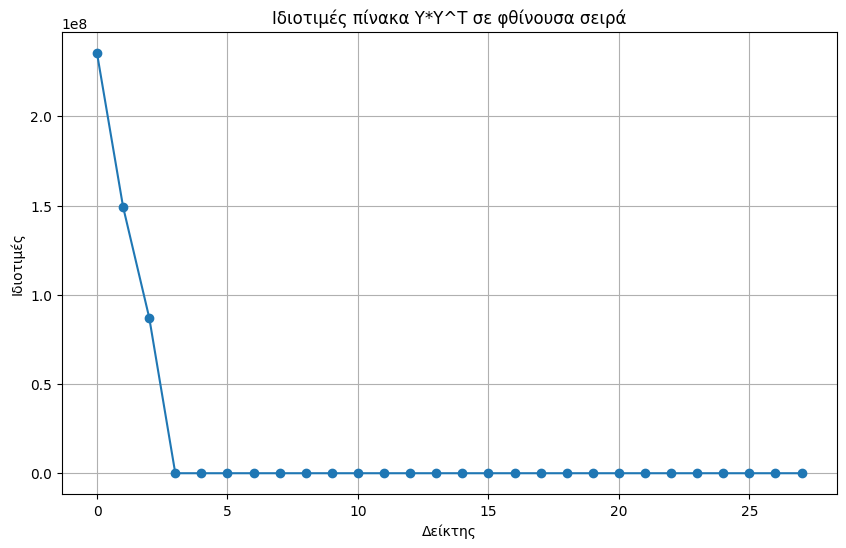

In [12]:
# Computing the matrix Y*Y.T
Y = points_max_dim
Y_YT = np.dot(Y, Y.T)

# Eigenvalues of Y*Y.T
eigenvalues, _ = np.linalg.eigh(Y_YT)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title('Ιδιοτιμές πίνακα Υ*Υ^Τ σε φθίνουσα σειρά')
plt.xlabel('Δείκτης')
plt.ylabel('Ιδιοτιμές')
plt.grid(True)
plt.show()

 Στο διάγραμμα, κάθε σημείο αντιπροσωπεύει την αξία μίας ιδιοτιμής, με τις ιδιοτιμές να έχουν ταξινομηθεί από τη μεγαλύτερη προς τη μικρότερη. Η κατανομή και το μέγεθος των ιδιοτιμών μπορούν να παρέχουν σημαντικές πληροφορίες σχετικά με τη δομή των δεδομένων στον πίνακα Y.

**Το διάγραμμα αυτό χρησιμοποιείται ως ένδειξη της βέλτιστης διάστασης αναπαράστασης, διατηρώντας τόσες διαστάσεις όσες οι σημαντικές ιδιοτιμές. Με βάση αυτό, πόσες διαστάσεις εκτιμάτε ότι είναι οι βέλτιστες για τα δεδομένα του αρχείου Distance_Matrix_world;**

Ο βέλτιστος αριθμός των διαστάσεων προς αναπαράσταση καθορίζεται από το σημείο όπου οι ιδιοτιμές δεν παρουσιάζουν δραστική μείωση. Στο παρόν πρόβλημα, τα δεδομένα μπορούν να περιγράφουν χωρίς περιττή πληροφορία και θόρυβο με μόλις τρεις διαστάσεις, καθώς οι επόμενες ιδιοτιμές έχουν μηδενική τιμή.

In [19]:
eigenvalues, _ = np.linalg.eigh(Y_YT)
print(eigenvalues)

[1.24728873e-09 8.86633803e-04 1.23050956e-02 4.73141149e-02
 1.46635257e-01 6.18056953e-01 8.77417929e-01 1.31721501e+00
 1.49795682e+00 2.16777373e+00 3.24628543e+00 4.05224717e+00
 5.18382060e+00 6.91230192e+00 1.17986404e+01 1.55933650e+01
 1.62955703e+01 2.46572897e+01 3.32950504e+01 5.69285829e+01
 6.18575768e+01 8.94005650e+01 1.32855277e+02 1.94440837e+02
 8.51224637e+02 8.72224663e+07 1.49210129e+08 2.35339825e+08]


# **BONUS**

**Για ποιο λόγο υπάρχουν μη μηδενικές ιδιοτιμές για περισσότερες των 3
διαστάσεων στο παραπάνω πρόβλημα;**

Το μήκος μέγιστων κύκλων αναφέρεται στην απόσταση μεταξύ δύο σημείων πάνω στην επιφάνεια της σφαίρας υπολογισμένη κατά μήκος του συντομότερου δρόμου. Σε αντίθεση με τις ευθείες αποστάσεις που μετράμε σε έναν επίπεδο χάρτη, οι αποστάσεις μέγιστων κύκλων λαμβάνουν υπόψη την καμπυλότητα της Γης και παρέχουν μια πιο ακριβή μέτρηση για μεγάλες αποστάσεις.

Οι αποστάσεις του αρχείου, λοιπόν, είναι μη ευκλείδειες, άρα απαιτούν περισσότερες διαστάσεις για να αποτυπωθούν στον ευκλείδειο χώρο. Οι τιμές των ιδιοτιμών δεν είναι ακριβώς μηδέν, αλλά κοντά στο μηδέν, δηλώνοντας ότι οι διαστάσεις αυτές περιέχουν σημαντική πληροφορία για την δομή των δεδομένων.


**Συγκρίνετε το αντίστοιχο διάγραμμα για τα δεδομένα του αρχείου Distance_Matrix_US. Που οφείλεται αυτή η διαφορά και πως σχετίζεται με τη φύση του προβλήματος και των δεδομένων;**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


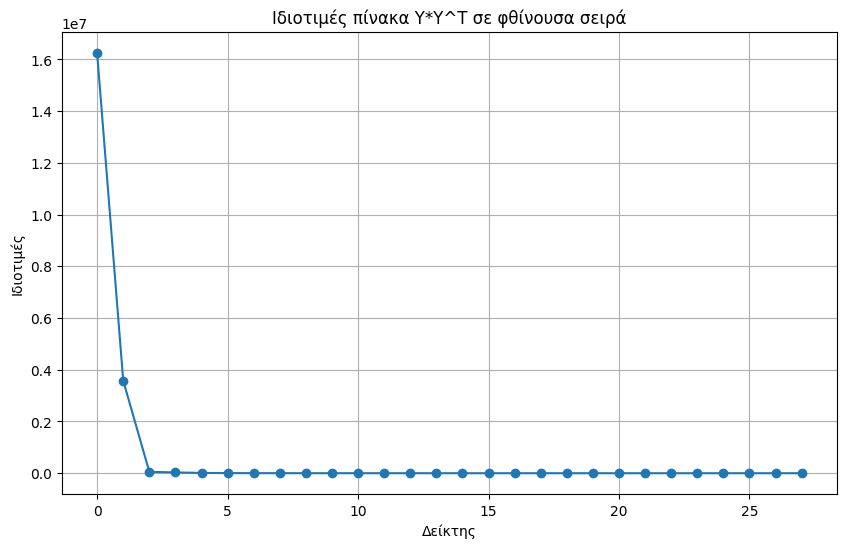

In [21]:
mds_us = MDS(n_components=us_distance.shape[0] - 1, dissimilarity='precomputed', random_state=1)
points_us = mds_us.fit_transform(us_distance)

# Computing Y*Y.T
Y_us = points_us
Y_us_YT = np.dot(Y_us, Y_us.T)

# Eigenvalues of Y*Y.T
eigenvalues_us, _ = np.linalg.eigh(Y_us_YT)
sorted_eigenvalues_us = np.sort(eigenvalues_us)[::-1]

plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues_us, marker='o')
plt.title('Ιδιοτιμές πίνακα Υ*Υ^Τ σε φθίνουσα σειρά')
plt.xlabel('Δείκτης')
plt.ylabel('Ιδιοτιμές')
plt.grid(True)
plt.show()


Τα δεδομένα για τις πόλεις των ΗΠΑ μπορούν να περιγράφουν χωρίς περιττή πληροφορία και θόρυβο με μόλις 2  διαστάσεις, καθώς οι επόμενες ιδιοτιμές έχουν μηδενική τιμή.




Η διαφορά των βέλτιστων διαστάσεων για τα δύο σύνολα δεδομένων, πόλεις του κόσμου και πόλεις των ΗΠΑ, οφείλεται στους ακόλουθους λόγους:

•	**Προβολή μήκους μέγιστου κύκλου**
Οι αποστάσεις μεταξύ πόλεων σε παγκόσμιο επίπεδο μπορεί να είναι πιο περίπλοκες και να μην αντιπροσωπεύονται εύκολα σε έναν ευκλείδειο χώρο, λόγω της καμπυλότητας της Γης.

•	**Διαφορετική Διακύμανση**
Το πρώτο σύνολο δεδομένων καλύπτει πόλεις σε παγκόσμιο επίπεδο περιλαμβάνοντας μεγαλύτερες αποστάσεις και περισσότερη διακύμανση σε αυτές έναντι του δεύτερου συνόλου που περιορίζεται σε γεωγραφικό πλάτος και μήκος.